# Clasificación de imágenes

## Cargar y explorar datos

Primeramente cargamos los datos desde un dataset real que provee keras. Este dataset contiene **imágenes**, representadas de ahora en adelante con una *x* (`x_train`, `x_test`) y sus respectivas **etiquetas**, representadas con una *y* (`y_train`, `y_test`). Note que los 4 resultados que brinda `load_data()` son de tipo ndarray, que es del paquete numpy.

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


El primer valor de los 4 arrays son las filas. Por lo tanto, las imágenes y etiquetas de entrenamiento tienen 50000 filas, y las imágenes y etiquetas de prueba tienen 10000. Todas las etiquetas tienen una sola columna indicando la etiqueta a la que pertenece su análogo en *x*. Sin embargo, lo interesante son las dimensiones de las imágenes. Cada fila de *x* tiene una imagen de 32x32 con 3 colores (rojo, verde, azul).

In [2]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


## Definición de etiquetas

Este dataset en particular contiene las siguientes definidas en `etiquetas_dataset`. Este array lo usaremos más adelante para determinar si nuestro modelo pudo determinar de manera correcta la predicción.

In [3]:
etiquetas_dataset = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Explorar una imagen de entrenamiento

Exploramos y desplegamos una imagen al azar para entender el contenido de una fila.

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 254]
  [253 253 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 255]
  [253 253 254]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 254]
  [253 253 254]
  [255 255 255]]

 [[255 255 255]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 254]
  [253 253 253]
  [255 255 255]]]


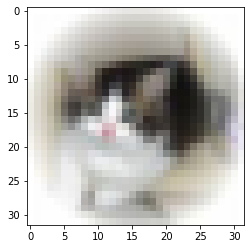

In [5]:
import matplotlib.pyplot as plt

ejemplo_index = 203
x_train[ejemplo_index]

print(x_train[ejemplo_index])
img = plt.imshow(x_train[ejemplo_index])

## Explorar una etiqueta de entrenamiento

Es importante tomar en cuenta que las etiquetas están representadas por números. Por lo tanto, siempre tendremos que tomar en cuenta el array definido en `etiquetas_dataset` para identificar la etiqueta respectiva. Esto aplicando tanto para el entrenamiento, la prueba, como la predicción.

In [6]:
print("Valor 'Y': ", y_train[ejemplo_index])
print("Palabra 'Y': ", etiquetas_dataset[y_train[ejemplo_index][0]])

Valor 'Y':  [3]
Palabra 'Y':  cat


## Covertir las etiquetas en números

Para realizar el entrenamiento, el modelo en **y** necesita que cada fila sea un array de 10 elementos (la cantidad de etiquetas). Por lo tanto, ocupamos convetir esas etiquetas a números únicos para cada etiqueta.

In [7]:
from keras.utils import to_categorical

y_train_numeros = to_categorical(y_train)
y_test_numeros = to_categorical(y_test)

print("'Y' valor ententero: ", y_train_numeros[ejemplo_index])

'Y' valor ententero:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Normalizar las imágenes

La otra preparación que necesitamos hacer es normalizar las imágenes *x*. Por lo que los pixels tendrán valores entre 0 y 1.

In [8]:
x_train = x_train / 255
x_test = x_test / 255
x_train[ejemplo_index]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0

## Arquitectura para el modelo (FALTA)

Definimos una arquitectura para el modelo.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

def construir_modelo():
    modelo = Sequential()
    
    # Primera capa
    modelo.add(Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))

    # Capa pooling
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa convolution
    modelo.add(Conv2D(32, (5, 5), activation="relu"))

    # Capa pooling
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa Flattening
    modelo.add(Flatten())

    # Neuronas:
    # 1000 neuronas
    modelo.add(Dense(1000, activation="relu"))

    # Dropout al 50%
    modelo.add(Dropout(0.5))

    # 500 neuronas
    modelo.add(Dense(500, activation="relu"))

    # Dropout al 50%
    modelo.add(Dropout(0.5))

    # 250 neuronas
    modelo.add(Dense(250, activation="relu"))

    # 10 neuronas
    modelo.add(Dense(10, activation="softmax"))
    return modelo

## Compilar modelo

Luego de definir la arquitectura, obtenemos el modelo y lo compilamos para empezar a entrenar y predecir.

In [10]:
modelo = construir_modelo()
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Realizamos el entrenamiento (FALTA)

Para realizar el entrenamiento, pasamos como parámetro las imágenes de entrenamiento `x_train`, las etiquetas de entrenamiento en números `y_train_enteros`, y una configuración predeterminada.

In [12]:
entrenamiento = modelo.fit(x_train, y_train_numeros, batch_size=256, epochs=15, validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 13s 83ms/step - loss: 1.8086 - accuracy: 0.3248 - val_loss: 1.5793 - val_accuracy: 0.4287
Epoch 2/15
157/157 [==============================] - 13s 81ms/step - loss: 1.4641 - accuracy: 0.4619 - val_loss: 1.3050 - val_accuracy: 0.5306
Epoch 3/15
157/157 [==============================] - 13s 80ms/step - loss: 1.3103 - accuracy: 0.5253 - val_loss: 1.3225 - val_accuracy: 0.5280
Epoch 4/15
157/157 [==============================] - 13s 81ms/step - loss: 1.2173 - accuracy: 0.5638 - val_loss: 1.1452 - val_accuracy: 0.5969
Epoch 5/15
157/157 [==============================] - 13s 81ms/step - loss: 1.1251 - accuracy: 0.5959 - val_loss: 1.0831 - val_accuracy: 0.6148
Epoch 6/15
157/157 [==============================] - 13s 81ms/step - loss: 1.0388 - accuracy: 0.6307 - val_loss: 1.0283 - val_accuracy: 0.6336
Epoch 7/15
157/157 [==============================] - 13s 81ms/step - loss: 0.9826 - accuracy: 0.6496 - val_loss: 1.0118 - val_accuracy:

## Evaluación del modelo

Realizamos una evaluación del modelo llamando al método `evaluate`. Note que ocupamos pasar las imágenes de prueba `x_test` y las etiquetas de prueba `y_test_enteros`. En este caso en particular, la precisión ronda alrededor del 60%.

313/313 [==============================] - 1s 4ms/step - loss: 0.9242 - accuracy: 0.6864


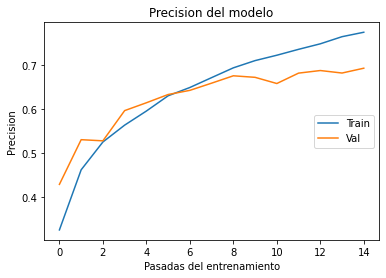

In [13]:
modelo.evaluate(x_test, y_test_numeros)[1]

plt.plot(entrenamiento.history["accuracy"])
plt.plot(entrenamiento.history["val_accuracy"])
plt.title("Precision del modelo")
plt.ylabel("Precision")
plt.xlabel("Pasadas del entrenamiento")
plt.legend(["Train", "Val"], loc="right")

## Ejemplo real

### Predicción

Para realizar una predicción con una imagen real, necesitamos primeramente cargar la imagen y transformarla obligatoriamente a 32x32. Recuerde que definimos esas dimensiones a la hora de crear y entrenar el modelo. Luego, usamos el método `modelo.predict(np.array([imagen_pequenna]))`. `predict` recibe un array de numpy con la imagen transformada previamente. La predicción retorna un array con un solo elemento también de tipo array, por lo que por comodidad devolvemos el array interno. Dicho "array interno" tiene 10 elementos. Cada elemento representa el nivel de confianza de la predicción para cada etiqueta respectivamente en `etiquetas_dataset`.

In [15]:
from skimage.transform import resize
import numpy as np

def obtener_prediccion(imagen):
    # Cargar imagen y transformarla a 32x32
    nueva_imagen = plt.imread(imagen)
    imagen_pequenna = resize(nueva_imagen, (32,32,3))

    # Realizar prediccion
    prediccion_array = modelo.predict(np.array([imagen_pequenna]))
    return prediccion_array[0]

prediccion_perrito = obtener_prediccion("perrito.jpg")
print(prediccion_perrito)

1/1 [==============================] - 0s 11ms/step
[3.0011304e-06 2.2666775e-06 2.7345691e-03 2.1462059e-01 1.6561075e-03
 7.6265490e-01 1.7577399e-02 7.4139313e-04 3.4605050e-06 6.3500852e-06]


### Desplegar resultados de la predicción

Se define un array `etiquetas_predicciones` de 0 a 9 que representan las etiquetas definidas previamente. Luego, de mayor a menor y tomando en cuenta `prediccion_array`, se ordena `etiquetas_predicciones`. Con este procedimiento podemos obtener las etiquetas con mejor precisión.

In [16]:
def imprimir_5_mejores_predicciones(prediccion):
    etiquetas_predicciones = [0,1,2,3,4,5,6,7,8,9]

    # Ordenar el array manualmente de acuerdo a prediccion_array de mayor a menos
    for i in range(10):
        for j in range(10):
            if prediccion[etiquetas_predicciones[i]] > prediccion[etiquetas_predicciones[j]]:
                temp = etiquetas_predicciones[i]
                etiquetas_predicciones[i] = etiquetas_predicciones[j]
                etiquetas_predicciones[j] = temp

    print(etiquetas_predicciones)
    for i in range(5):
        print(etiquetas_dataset[etiquetas_predicciones[i]])
        
imprimir_5_mejores_predicciones(prediccion_perrito)

[5, 3, 6, 2, 4, 7, 9, 8, 0, 1]
dog
cat
frog
bird
deer
